# Getting RIVM subtypes for EV-D68 whole genome sequences

In [ ]:
from Bio import SeqIO
import re
import sys

## Write the sequence.fasta to 6 different scripts, batch sizes n=250
seq = SeqIO.parse("~/workspace/fluclades/sequences.fasta", "fasta")
seqs = list(seq)
n = 250
for i in range(0, len(seqs), n):
    with open(f"batch_{i//n}.fasta", "w") as f:
        SeqIO.write(seqs[i:i+n], f, "fasta")


## RIVM
jobids:
- 1323197622
- 1955294092
- 1478213118
- 2084693138
- 587450456
- 1742805430

use [this link](https://www.rivm.nl/mpf/typingtool/enterovirus/job/1742805430) to access the results.

In [8]:
## read the results files and combine them to one dataframe
import pandas as pd
import os

dfs = []

# the results files are named RIVM/results (0).csv, RIVM/results (1).csv, ...
for i in range(0, 6):
    df = pd.read_csv(f"~/workspace/fluclades/RIVM/results ({i}).csv")
    dfs.append(df)

df = pd.concat(dfs)
df.drop_duplicates(subset="name", inplace=True)
df

,name,begin,length,end,refseq,reverse complement,BLAST result,BLAST score,type,type support,VP1 type,VP1 type support,VP1 subgenogroup,VP1 subgenogroup support
0,KT455422,479,6875,7373,NC_001430,False,Picornaviridae Enterovirus D,92.792660,EV-D68,100.0,EV-D68,100.0,B2,100.0
1,KT455423,477,6875,7371,NC_001430,False,Picornaviridae Enterovirus D,92.694330,EV-D68,100.0,EV-D68,100.0,B1,100.0
2,KT455424,478,6883,7380,NC_001430,False,Picornaviridae Enterovirus D,92.792660,EV-D68,100.0,EV-D68,100.0,B1,100.0
3,KT455425,478,6879,7376,NC_001430,False,Picornaviridae Enterovirus D,92.909150,EV-D68,100.0,EV-D68,100.0,B1,100.0
4,KT455426,478,6883,7380,NC_001430,False,Picornaviridae Enterovirus D,92.866500,EV-D68,100.0,EV-D68,100.0,B1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,KT347277,53,7284,7356,NC_001430,False,Picornaviridae Enterovirus D,92.889496,EV-D68,100.0,EV-D68,100.0,B1,100.0
281,KT347278,53,7284,7356,NC_001430,False,Picornaviridae Enterovirus D,93.164040,EV-D68,100.0,EV-D68,100.0,B1,100.0
282,KT347279,53,7284,7356,NC_001430,False,Picornaviridae Enterovirus D,93.164040,EV-D68,100.0,EV-D68,100.0,B1,100.0
283,KT347280,41,7293,7356,NC_001430,False,Picornaviridae Enterovirus D,92.883590,EV-D68,100.0,EV-D68,100.0,A1,100.0


In [11]:

# what are the contents of the columns?
for col in df.columns:
    print(col, df[col].unique())

name ['KT455422' 'KT455423' 'KT455424' ... 'KT347279' 'KT347280' 'KT455421']
begin [479 477 478  26  29  17 161 173  30  52  50  51  49  53  41  55  54  28
  39 199  18 206 503  40 726  34  70  42  36  60  65  82 165 249 251  27
  32  21 118 257  99 252  20 253 231  57  31 167  74  66  44  25  24  73
  48  72  83 187  63  62  43  56 109  68  90 129  76  78  96  38  61  59
  84  46  19  23  22   6  98  85  97  95  86  37  35  33  64  47 193 205
 106 105 279 107  79  91  69  87 108  89  88  81 147 148 113 100 207  71
  58  67  75 192 180 114 115  15  12  93  45 529 155 214 258 244 245 213
 283 183 172  16 391]
length [6875 6883 6879 6877 7332 7329 7341 7033 7024 7320 7291 7288 7292 7289
 7253 7290 7319 7336 7271 7267 7284 7285 7282 7281 7274 7283 7293 7268
 7201 7318 7309 7091 7340 7112 6815 7303 7330 7331 7305 6567 7316 7333
 7324 7325 7300 7313 7279 7196 7110 7338 7322 7337 7326 7328 7249 7203
 7255 7155 7015 7173 7224 6736 7272 7019 7065 7252 7263 7174 6794 7304
 7317 7260 7296 7298 7

VP1 subgenogroup
B3                  916
B1                  280
A2                  167
A1                   64
C                    44
B2                   30
Could not assign     15
US00                  8
B                     4
US02                  2
A                     2
NL96                  2
U1                    1
Name: count, dtype: int64

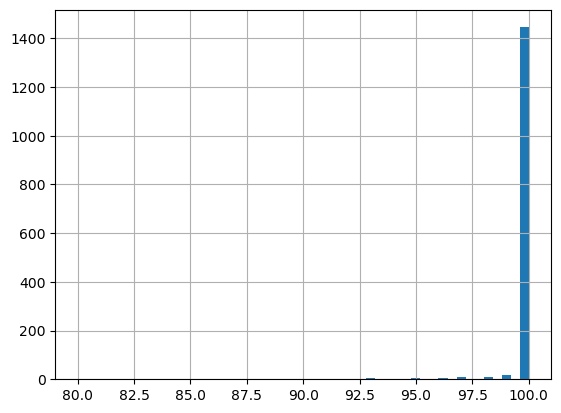

In [20]:
df["VP1 subgenogroup support"].hist(bins=50)
df["VP1 subgenogroup"].value_counts()

In [21]:
# show the rows that have NL96, US00, US02, NL96, U1
df[df["VP1 subgenogroup"].str.contains("NL96|US00|US02|NL96,U1", na=False)]

,name,begin,length,end,refseq,reverse complement,BLAST result,BLAST score,type,type support,VP1 type,VP1 type support,VP1 subgenogroup,VP1 subgenogroup support
157,KX255353,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.896030,EV-D68,100.0,EV-D68,100.0,US00,100.0
161,KX255357,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,97.047110,EV-D68,100.0,EV-D68,100.0,US00,99.0
195,KX255391,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,97.033380,EV-D68,100.0,EV-D68,100.0,US00,100.0
204,KX255400,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.223045,EV-D68,100.0,EV-D68,100.0,US02,80.0
209,KX255405,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.992170,EV-D68,100.0,EV-D68,100.0,US00,100.0
8,KX433166,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.923500,EV-D68,100.0,EV-D68,100.0,US00,100.0
239,MN240497,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,96.931680,EV-D68,100.0,EV-D68,100.0,US00,100.0
240,MN240498,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,96.508934,EV-D68,100.0,EV-D68,100.0,US00,100.0
242,MN240500,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,96.127100,EV-D68,100.0,EV-D68,100.0,US00,100.0
249,MN240509,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,96.127100,EV-D68,100.0,EV-D68,100.0,US02,100.0


VP1 subgenogroup support is generally very high. The strange subgenotypes above are kept for now but might be removed at a later point. 

In [22]:
df[df["VP1 subgenogroup"].str.contains("Could not assign", na=False)]

,name,begin,length,end,refseq,reverse complement,BLAST result,BLAST score,type,type support,VP1 type,VP1 type support,VP1 subgenogroup,VP1 subgenogroup support
176,KX255372,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.209310,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
192,KX255388,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.250520,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
197,KX255393,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,95.618730,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
201,KX255397,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,95.220436,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
214,KX255410,52,7285,7356,NC_001430,False,Picornaviridae Enterovirus D,96.209310,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
2,KX384960,49,7201,7268,NC_001430,False,Picornaviridae Enterovirus D,96.260770,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
243,MN240501,18,7340,7380,NC_001430,False,Picornaviridae Enterovirus D,95.275055,EV-D68,100.0,EV-D68,100.0,Could not assign,84.0
244,MN240502,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,95.949814,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
1,MN240511,29,7332,7380,NC_001430,False,Picornaviridae Enterovirus D,95.977090,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN
7,PQ415017,726,6518,7262,NC_001430,False,Picornaviridae Enterovirus D,91.653885,EV-D68,100.0,EV-D68,100.0,Could not assign,NaN


In [24]:
# replace the "Could not assign" with actual values: (hacky solution, copy pasted from RIVM website)
# KX255372 Assignment: US02 Bootstrap support: 72.0
df.loc[df.name == "KX255372", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255372", "VP1 subgenogroup support"] = 72.0
# KX255388 Assignment: US02 Bootstrap support: 59.0
df.loc[df.name == "KX255388", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255388", "VP1 subgenogroup support"] = 59.0
# KX255393 Assignment: C Bootstrap support: 17.0
df.loc[df.name == "KX255393", "VP1 subgenogroup"] = "C"
df.loc[df.name == "KX255393", "VP1 subgenogroup support"] = 17.0
# KX255397 Assignment: C Bootstrap support: 19.0
df.loc[df.name == "KX255397", "VP1 subgenogroup"] = "C"
df.loc[df.name == "KX255397", "VP1 subgenogroup support"] = 19.0
# KX255410 Assignment: US02 Bootstrap support: 77.0
df.loc[df.name == "KX255410", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX255410", "VP1 subgenogroup support"] = 77.0

# KX384960 Assignment: US02 Bootstrap support: 25.0
df.loc[df.name == "KX384960", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KX384960", "VP1 subgenogroup support"] = 25.0
# MN240501 Assignment: A Bootstrap support: 76.0
df.loc[df.name == "MN240501", "VP1 subgenogroup"] = "A"
df.loc[df.name == "MN240501", "VP1 subgenogroup support"] = 76.0
# MN240502 Assignment: US02 Bootstrap support: 38.0
df.loc[df.name == "MN240502", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "MN240502", "VP1 subgenogroup support"] = 38.0
# MN240511 Assignment: US02 Bootstrap support: 69.0
df.loc[df.name == "MN240511", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "MN240511", "VP1 subgenogroup support"] = 69.0
# PQ415017 Assignment: A2 Bootstrap support: 9.0 
df.loc[df.name == "PQ415017", "VP1 subgenogroup"] = "A2"
df.loc[df.name == "PQ415017", "VP1 subgenogroup support"] = 9.0
# AB601885 Assignment: C Bootstrap support: 71.0
df.loc[df.name == "AB601885", "VP1 subgenogroup"] = "C"
df.loc[df.name == "AB601885", "VP1 subgenogroup support"] = 71.0
# KM892501 Assignment: B1 Bootstrap support: 40.0
df.loc[df.name == "KM892501", "VP1 subgenogroup"] = "B1"
df.loc[df.name == "KM892501", "VP1 subgenogroup support"] = 40.0
# KP455263 Assignment: NL96 Bootstrap support: 43.0
df.loc[df.name == "KP455263", "VP1 subgenogroup"] = "NL96"
df.loc[df.name == "KP455263", "VP1 subgenogroup support"] = 43.0
# KP455289 Assignment: US02 Bootstrap support: 38.0
df.loc[df.name == "KP455289", "VP1 subgenogroup"] = "US02"
df.loc[df.name == "KP455289", "VP1 subgenogroup support"] = 38.0
# KT285484 Assignment: A Bootstrap support: 0.0
df.loc[df.name == "KT285484", "VP1 subgenogroup"] = "A"
df.loc[df.name == "KT285484", "VP1 subgenogroup support"] = 0.0

df["VP1 subgenogroup"].value_counts()


VP1 subgenogroup
B3      916
B1      281
A2      168
A1       64
C        47
B2       30
US02      9
US00      8
B         4
A         4
NL96      3
U1        1
Name: count, dtype: int64

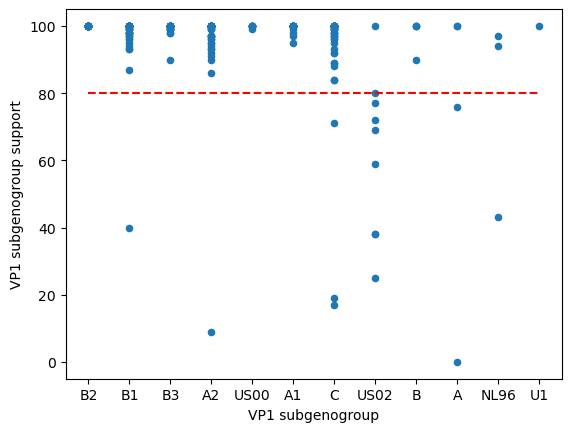

In [50]:
import matplotlib.pyplot as plt

df.plot(x="VP1 subgenogroup", y="VP1 subgenogroup support", kind="scatter")
plt.plot([0, 11], [80, 80], color='red', linestyle='--')


US02 and C have the worst support. The normal cut-off is 80% in RIVM. 

In [62]:
# get a lookup table with all bootstrapping values higher than 60%, replace below 60% with "Unassigned"
data = df[["name", "VP1 subgenogroup", "VP1 subgenogroup support"]]
data["VP1 subgenogroup support"] = data["VP1 subgenogroup support"].apply(lambda x: x if x > 60 else "Unassigned")
data.drop("VP1 subgenogroup support",axis=1,inplace=True)
data.to_csv("~/workspace/fluclades/RIVM_genotype.csv", index=False)
data

/tmp/ipykernel_3654/45280505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VP1 subgenogroup support"] = data["VP1 subgenogroup support"].apply(lambda x: x if x > 60 else "Unassigned")
/tmp/ipykernel_3654/45280505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("VP1 subgenogroup support",axis=1,inplace=True)


,name,VP1 subgenogroup
0,KT455422,B2
1,KT455423,B1
2,KT455424,B1
3,KT455425,B1
4,KT455426,B1
...,...,...
280,KT347277,B1
281,KT347278,B1
282,KT347279,B1
283,KT347280,A1


## Plotting a phylotree

Node: i, n = 2, y = 0.6000, l = 0.0000
Node: a, n = 1, y = 0.0000, l = 0.1000
Node: b, n = 1, y = 0.0000, l = 0.2000


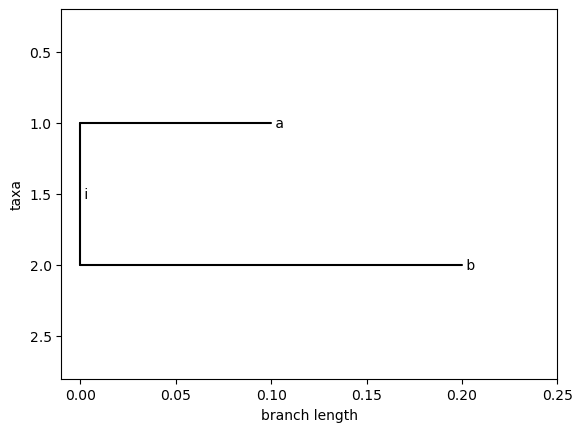

In [6]:
from Bio import Phylo
from io import StringIO

# Create a simple cherry tree: a and b are tips, i is their parent
# Branch lengths: l_a = 0.1, l_b = 0.2
newick = "(a:0.1,b:0.2)i;"

# Read the tree from Newick format
tree = Phylo.read(StringIO(newick), "newick")

# Tip attributes
tip_data = {
    "a": {"n": 1, "y": 0, "l": 0.1},
    "b": {"n": 1, "y": 0, "l": 0.2},
}

# Traverse tree and compute y_i for internal nodes
def compute_internal_metrics(tree):
    for clade in tree.find_clades(order='postorder'):
        if clade.is_terminal():
            clade.n = 1
            clade.y = 0
            clade.l = clade.branch_length
        else:
            children = clade.clades
            a, b = children[0], children[1]
            clade.n = a.n + b.n
            na, nb = a.n, b.n
            ya, yb = a.y, b.y
            da, db = a.branch_length, b.branch_length
            la, lb = getattr(a, 'l', da), getattr(b, 'l', db)
            
            numerator = (na * (na - 1) / 2) * ya + (nb * (nb - 1) / 2) * yb + na * nb * (da + db + la + lb)
            denominator = (na * (na - 1) / 2) + (nb * (nb - 1) / 2) + na * nb
            clade.y = numerator / denominator
            clade.l = 0  # Internal branches can have zero length here or can be set if known

compute_internal_metrics(tree)

# Print results
for clade in tree.find_clades(order='preorder'):
    name = clade.name or "internal"
    print(f"Node: {name}, n = {clade.n}, y = {clade.y:.4f}, l = {clade.l:.4f}")

# Optional: draw tree (requires matplotlib)
Phylo.draw(tree)